## How to read various files format with Python


* Data is acquired in various formats, mainly depending on its content. Therefore, to succeed in the data science industry one needs to read, analyze and interpret data as efficiently as possible. Herein, we summarise how different file formats can be accessed via Python

### Reading CSV Files

#### CSV.READER

In [63]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
file = open('biostats.csv')
csvreader = csv.reader(file)

# Extract headers
header = []
header = next(csvreader)
header

# Extral actual data points
rows = []
for row in csvreader:
        rows.append(row)
rows

print(header)
print(rows)

['Name', '     "Sex"', ' "Age"', ' "Height (in)"', ' "Weight (lbs)"']
[['Alex', '       "M"', '   41', '       74', '      170'], ['Bert', '       "M"', '   42', '       68', '      166'], ['Carl', '       "M"', '   32', '       70', '      155'], ['Dave', '       "M"', '   39', '       72', '      167'], ['Elly', '       "F"', '   30', '       66', '      124'], ['Fran', '       "F"', '   33', '       66', '      115'], ['Gwen', '       "F"', '   26', '       64', '      121'], ['Hank', '       "M"', '   30', '       71', '      158'], ['Ivan', '       "M"', '   53', '       72', '      175'], ['Jake', '       "M"', '   32', '       69', '      143'], ['Kate', '       "F"', '   47', '       69', '      139'], ['Luke', '       "M"', '   34', '       72', '      163'], ['Myra', '       "F"', '   23', '       62', '       98'], ['Neil', '       "M"', '   36', '       75', '      160'], ['Omar', '       "M"', '   38', '       70', '      145'], ['Page', '       "F"', '   31', '       67',

In [65]:
with open('biostats.csv') as file:
    content = file.readlines()
header = content[:1] 
rows = content[1:]
print(header)
print(rows)
#where 'n' denotes the end of a row

['"Name",     "Sex", "Age", "Height (in)", "Weight (lbs)"\n']
['"Alex",       "M",   41,       74,      170\n', '"Bert",       "M",   42,       68,      166\n', '"Carl",       "M",   32,       70,      155\n', '"Dave",       "M",   39,       72,      167\n', '"Elly",       "F",   30,       66,      124\n', '"Fran",       "F",   33,       66,      115\n', '"Gwen",       "F",   26,       64,      121\n', '"Hank",       "M",   30,       71,      158\n', '"Ivan",       "M",   53,       72,      175\n', '"Jake",       "M",   32,       69,      143\n', '"Kate",       "F",   47,       69,      139\n', '"Luke",       "M",   34,       72,      163\n', '"Myra",       "F",   23,       62,       98\n', '"Neil",       "M",   36,       75,      160\n', '"Omar",       "M",   38,       70,      145\n', '"Page",       "F",   31,       67,      135\n', '"Quin",       "M",   29,       71,      176\n', '"Ruth",       "F",   28,       65,      131\n', '\n']


#### Pandas Library

Although the previous method seems to work fine, we need to consider the complexity of huge datasets. When analysing big datasets it is essential to be able to access the data easily and efficiently, in that regard the most straight-forward way to achieve this, is via the "pandas" library

In [66]:
dataset1 = pd.read_csv('biostats.csv', delimiter = ',')
dataset1.columns = dataset1.columns.str.replace('[#,@,&,"",'', ]', '')
dataset1.head()

<ipython-input-66-9677b6cb668b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1.columns = dataset1.columns.str.replace('[#,@,&,"",'', ]', '')


,Name,Sex,Age,Height(in),Weight(lbs)
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124


The pandas library also allows the user to access specific columns and therefore permits him to focus with any variable of interest. For example we could compare the age of people within our dataset as follows. In this case, we can notice that majority of participants are young adults aged between 30-35 years old.

Text(0.5, 0, 'Age')

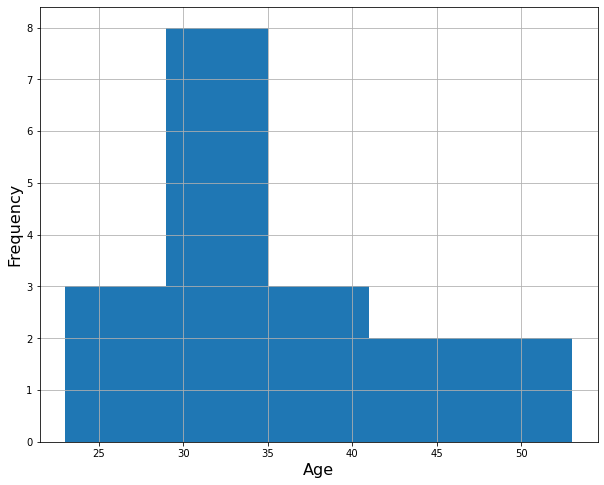

In [67]:
plt.figure ( figsize = (10,8))
dataset1.Age
dataset1.Age.hist(bins = 5)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Age', fontsize = 16)

### Creating  CSV Files

Let's assume we log daily average temperature and air quality data for the last week

#### CSV.WRITER

In [68]:
header = ['Day', 'Temperature (Celsius)', 'Air Quality Index']

rows = [['Monday 01/10', 25.2, 150], ['Tuesday 02/10', 27.3, 160], ['Wendnesday 03/10', 26, 165],
        ['Thursday 04/10', 24.6, 160], ['Friday 05/10', 22.8, 142], ['Saturday 06/10', 23, 155],
        ['Sunday 07/10', 24.6, 145]]

In [70]:
filename = 'Biostats.csv'

with open(filename, 'w', newline="") as file:
    csvwriter = csv.writer(file) # 2. create a csvwriter object
    csvwriter.writerow(header)  # 4. write the header
    csvwriter.writerows(rows)  # 5. write the rest of the data

#### Using Pandas

In [72]:
df= pd.DataFrame(rows, columns=header)
df.to_csv('Bio.csv', index=False)